In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Downloads\delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [5]:
data=data.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6d3fa8f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6d3fc4640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6d3fa8be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6d3fc4d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6d3fcf0a0>],
 'means': []}

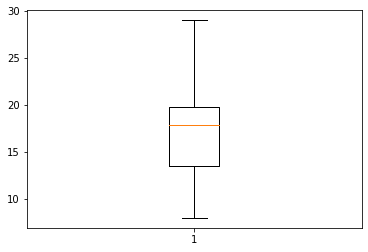

In [6]:
plt.boxplot(data.dt)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <BarContainer object of 5 artists>)

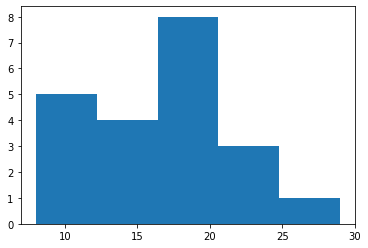

In [7]:
plt.hist(data.dt, bins=5)

In [8]:
import statsmodels.formula.api as smf
model = smf.ols('dt~st',data = data).fit()

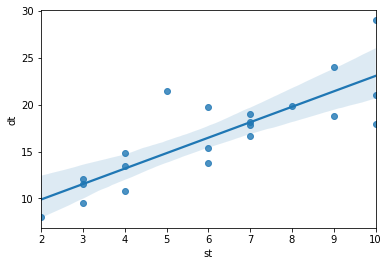

In [9]:
sns.regplot(x="st", y="dt", data=data);

In [10]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [11]:
print(model.tvalues, '\n', model.pvalues) 

Intercept    3.823349
st           6.387447
dtype: float64 
 Intercept    0.001147
st           0.000004
dtype: float64


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        22:12:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.conf_int(0.05) 

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [14]:
pred = model.predict(data.iloc[0:])

Text(0, 0.5, 'Delivery time')

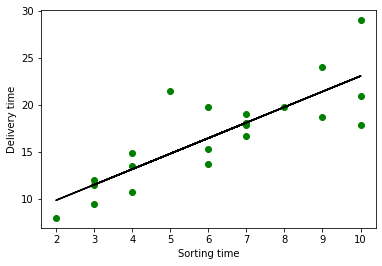

In [15]:
plt.scatter(x=data.st, y=data.dt, color='green')
plt.plot(data.st, pred,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [16]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [17]:
model1 = smf.ols('dt~np.log(st)',data = data).fit()#Exponential Model

In [18]:
model1.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [19]:
print(model1.tvalues, '\n', model1.pvalues) 

Intercept     0.472460
np.log(st)    6.586789
dtype: float64 
 Intercept     0.641980
np.log(st)    0.000003
dtype: float64


In [20]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.64e-06
Time:                        22:12:35   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model1.conf_int(0.05) 

,0,1
Intercept,-3.97778,6.297147
np.log(st),6.16977,11.917057


In [22]:
pred1 = model1.predict(data.iloc[0:])

Text(0, 0.5, 'Delivery time')

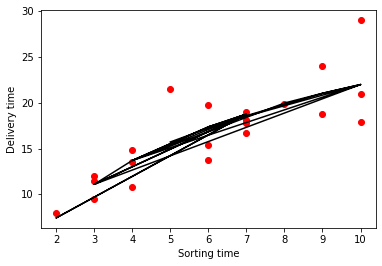

In [23]:
plt.scatter(x=data.st, y=data.dt, color='red')
plt.plot(data.st, pred1,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [24]:
(model1.rsquared,model1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [25]:
model2 = smf.ols('np.log(dt)~st',data = data).fit()#Logratnmic Model

In [26]:
model2.params

Intercept    2.121372
st           0.105552
dtype: float64

In [27]:
print(model2.tvalues, '\n', model2.pvalues) 

Intercept    20.601357
st            6.836088
dtype: float64 
 Intercept    1.857343e-14
st           1.592708e-06
dtype: float64


In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.59e-06
Time:                        22:12:36   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
st             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model2.conf_int(0.05) 

,0,1
Intercept,1.905848,2.336896
st,0.073235,0.137869


In [30]:
pred2 = model2.predict(data.iloc[0:])

Text(0, 0.5, 'Delivery time')

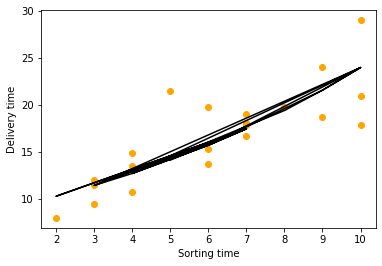

In [31]:
plt.scatter(x=data.st, y=data.dt, color='Orange')
plt.plot(data['st'], np.exp(pred2),color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [32]:
model3 = smf.ols('dt~np.sqrt(st)',data = data).fit()# Quadratic model

In [33]:
model3.params

Intercept     -2.518837
np.sqrt(st)    7.936591
dtype: float64

In [34]:
print(model2.tvalues, '\n', model2.pvalues) 

Intercept    20.601357
st            6.836088
dtype: float64 
 Intercept    1.857343e-14
st           1.592708e-06
dtype: float64


In [35]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.61e-06
Time:                        22:12:36   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(st)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model3.conf_int(0.05) 

,0,1
Intercept,-8.788214,3.750541
np.sqrt(st),5.416812,10.456370


In [37]:
pred3 = model3.predict(data.iloc[0:])

Text(0, 0.5, 'Delivery time')

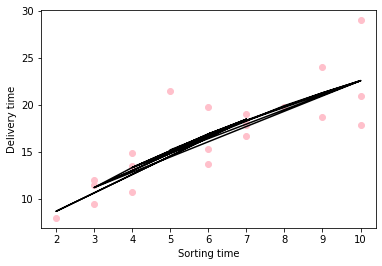

In [38]:
plt.scatter(x=data.st, y=data.dt, color='Pink')
plt.plot(data['st'], pred3,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [39]:
dataset = pd.read_csv('Downloads\Salary_Data.csv')

In [40]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [42]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f6d5aa85b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6d5ac52e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6d5aa8c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6d5ac53d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6d5ac5c10>],
 'means': []}

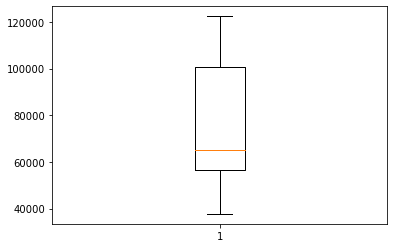

In [43]:
plt.boxplot(dataset.Salary)

In [44]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience',data = dataset).fit()

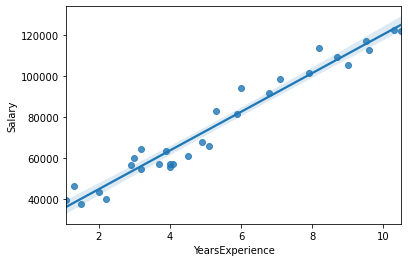

In [45]:
sns.regplot(x="YearsExperience", y="Salary", data=dataset);

In [46]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [47]:
print(model.tvalues, '\n', model.pvalues) 

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.14e-20
Time:                        22:12:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model.conf_int(0.05)

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [50]:
pred = model.predict(dataset.iloc[:,0])

Text(0, 0.5, 'Salary')

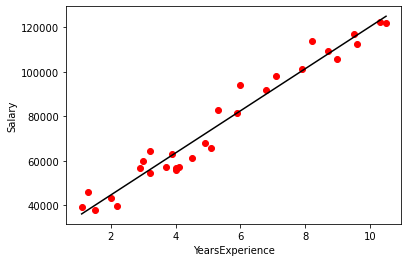

In [51]:
plt.scatter(x=dataset.YearsExperience, y=dataset.Salary, color='Red')
plt.plot(dataset['YearsExperience'], pred,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [52]:
model1 = smf.ols('Salary~np.log(YearsExperience)',data = dataset).fit()

In [53]:
model1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [54]:
print(model1.tvalues, '\n', model1.pvalues) 

Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 
 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [55]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           3.25e-13
Time:                        22:12:38   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
model1.conf_int(0.05)

,0,1
Intercept,4365.921305,25490.022235
np.log(YearsExperience),34083.511736,47080.464184


In [57]:
pred1 = model1.predict(dataset.iloc[:,0])

Text(0, 0.5, 'Salary')

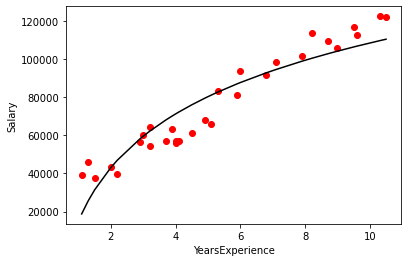

In [58]:
plt.scatter(x=dataset.YearsExperience, y=dataset.Salary, color='Red')
plt.plot(dataset['YearsExperience'], pred1,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [59]:
model2 = smf.ols('np.log(Salary)~YearsExperience',data = dataset).fit()

In [60]:
model2.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [61]:
print(model2.tvalues, '\n', model2.pvalues) 

Intercept          273.327166
YearsExperience     19.584833
dtype: float64 
 Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64


In [62]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           7.03e-18
Time:                        22:12:39   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model2.conf_int(0.05)

,0,1
Intercept,10.428656,10.586148
YearsExperience,0.112332,0.138574


In [64]:
pred2 = model2.predict(dataset.iloc[:,0])

Text(0, 0.5, 'Salary')

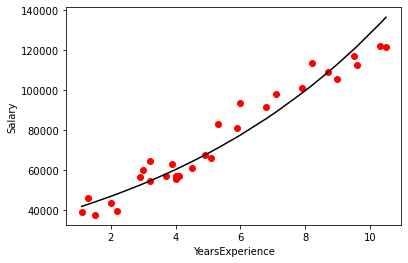

In [65]:
plt.scatter(x=dataset.YearsExperience, y=dataset.Salary, color='Red')
plt.plot(dataset['YearsExperience'], np.exp(pred2),color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [66]:
model3 = smf.ols('Salary~np.sqrt(YearsExperience)',data = dataset).fit()

In [67]:
model3.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [68]:
print(model3.tvalues, '\n', model3.pvalues) 

Intercept                   -3.262308
np.sqrt(YearsExperience)    19.437148
dtype: float64 
 Intercept                   2.906965e-03
np.sqrt(YearsExperience)    8.565358e-18
dtype: float64


In [69]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           8.57e-18
Time:                        22:12:40   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
model3.conf_int(0.05)

,0,1
Intercept,-26137.207361,-5974.330873
np.sqrt(YearsExperience),37127.081569,45874.279597


In [71]:
pred3 = model3.predict(dataset.iloc[:,0])

Text(0, 0.5, 'Salary')

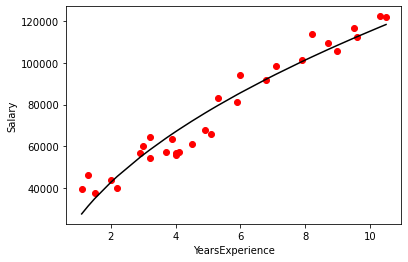

In [72]:
plt.scatter(x=dataset.YearsExperience, y=dataset.Salary, color='Red')
plt.plot(dataset['YearsExperience'], pred3,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")